# Lichess data visualization

Lichess data visualization

By Isthmus // Mitchell P. Krawiec-Thayer

## Import Libraries
(if you have any issues with the next cell, run `pip install -r requirements.txt` to install dependencies)

In [1]:
import isthmuslib as isli
import pandas as pd
import matplotlib.pyplot as plt
import os as os

## Set parameters

In [2]:
data_file_path = os.path.join(os.path.curdir)
data_file_name = 'puzzle_history.csv'

## Import data

See `lichessretrieval.py` in this repository to download your puzzle date. Note that it requires an OAuth token with puzzle read privs.

Next, load the csv file produced by `lichessretrieval.py`

In [3]:
df = pd.read_csv(os.path.join(data_file_path, data_file_name))
num_rows = len(df)
df['order'] = [num_rows - x for x in df['reverse_order']]
df.drop(['reverse_order'], axis=1)
df.head()

,reverse_order,id,date,win,rating,order
0,0,BUOKW,1624225327326,False,1776,789
1,1,FpzVL,1624222992015,True,1701,788
2,2,YCawL,1624222951692,False,1962,787
3,3,4JJ4z,1624222841473,True,1864,786
4,4,TvJCx,1624222751520,False,1837,785


## Data overview

In [4]:
df.describe()

,reverse_order,date,rating,order
count,789.000000,7.890000e+02,789.000000,789.000000
mean,394.000000,1.621958e+12,1793.547529,395.000000
std,227.908973,2.437419e+09,111.514058,227.908973
min,0.000000,1.612840e+12,1316.000000,1.000000
25%,197.000000,1.622163e+12,1725.000000,198.000000
50%,394.000000,1.622434e+12,1792.000000,395.000000
75%,591.000000,1.623613e+12,1860.000000,592.000000
max,788.000000,1.624225e+12,2211.000000,789.000000


## Stats by rating

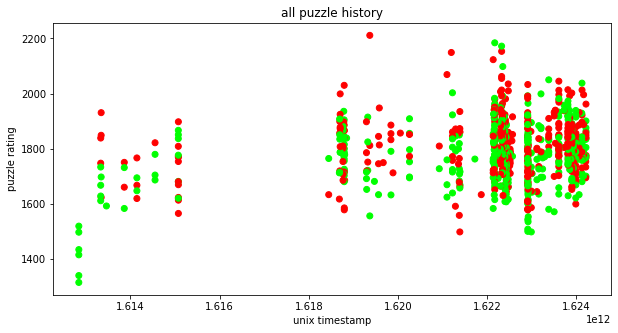

In [5]:
f = plt.figure(figsize=(10, 5), facecolor='w')
plt.scatter(df['date'], df['rating'], c=df['win'], cmap='brg', vmin=-1)
plt.xlabel('unix timestamp')
plt.title('all puzzle history')
plt.ylabel('puzzle rating');

Zoom in to see clusters representing individual training sessions

Below, see three training sessions.
+ In the first one, I got 4 puzzles right, then 1 wrong.
+ In the second one, I lost a few hard puzzles and won a few easier ones
+ In the third one, I got a bunch right then a few wrong

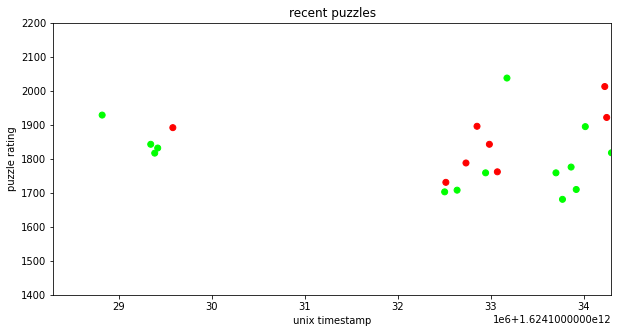

In [6]:
x_max_pin = 1624134299340  # pinnnig this so the window doesn't move when data set updates
f = plt.figure(figsize=(10, 5), facecolor='w')
plt.scatter(df['date'], df['rating'], c=df['win'], cmap='brg', vmin=-1)
plt.xlim((x_max_pin - 6e6, x_max_pin))
plt.xlabel('unix timestamp')
plt.title('recent puzzles')
plt.ylabel('puzzle rating')
plt.ylim((1400, 2200));

Plot by index to remove time gaps

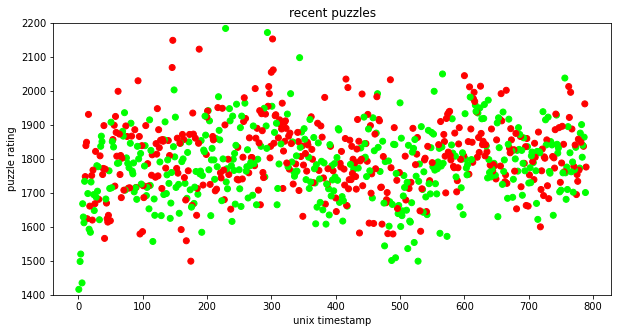

In [7]:
f = plt.figure(figsize=(10, 5), facecolor='w')
plt.scatter(df['order'], df['rating'], c=df['win'], cmap='brg', vmin=-1)
plt.xlabel('unix timestamp')
plt.title('recent puzzles')
plt.ylabel('puzzle rating')
plt.ylim((1400, 2200));

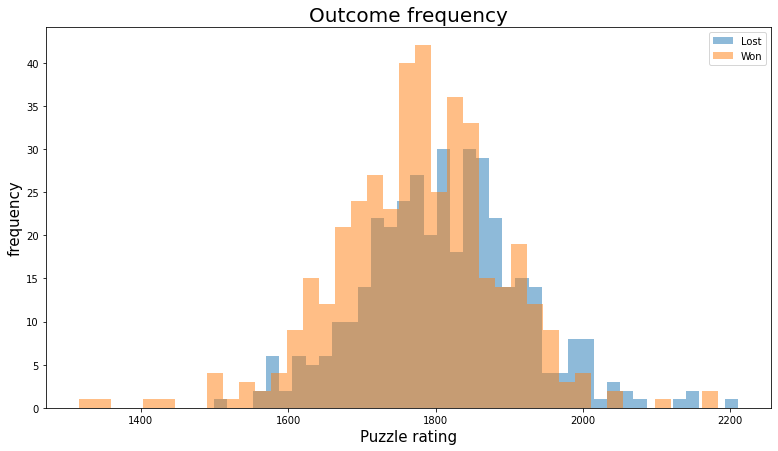

In [8]:
dataDict = {"Lost": df['rating'][df['win'] == False], "Won": df['rating'][df['win'] == True]}
isli.hist(dataDict, xlabel='Puzzle rating', title='Outcome frequency', alpha=0.5, bins=40);
plt.legend(('Lost', 'Won'));

## Stats by frequency

In [9]:
milliseconds_per_day: int = 86400000
number_of_days_in_data_set: int = round((max(df['date']) - min(df['date'])) / (milliseconds_per_day))
print('Number of days in data set = ' + str(round(number_of_days_in_data_set)) + ' (' + str(
    round(number_of_days_in_data_set / 365, 1)) + ' years)')


Number of days in data set = 132 (0.4 years)


In [10]:
daily_df = pd.DataFrame(df['date'].value_counts(bins=number_of_days_in_data_set, sort=False)).rename(
    columns={"date": "count"}).reset_index()
daily_df.head()

,index,count
0,"(1612828807089.898, 1612926443248.492]",6
1,"(1612926443248.492, 1613012694271.985]",0
2,"(1613012694271.985, 1613098945295.477]",0
3,"(1613098945295.477, 1613185196318.97]",0
4,"(1613185196318.97, 1613271447342.462]",0


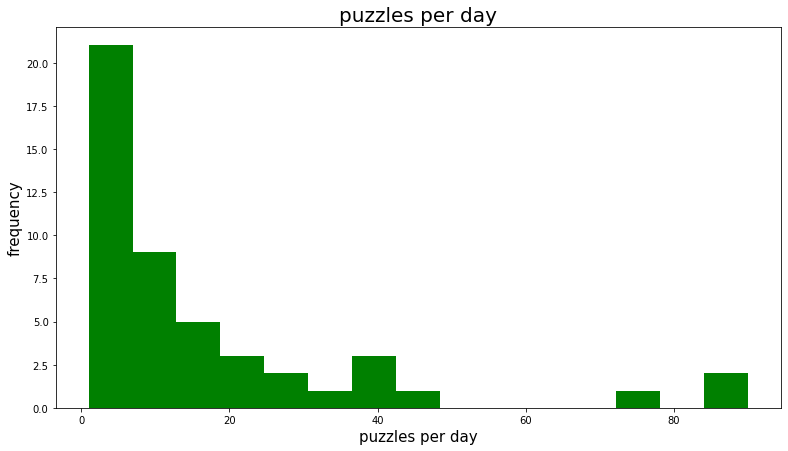

In [11]:
isli.hist(daily_df['count'][daily_df['count'] > 0], bins=15, xlabel='puzzles per day', ylabel='frequency',
          title='puzzles per day');

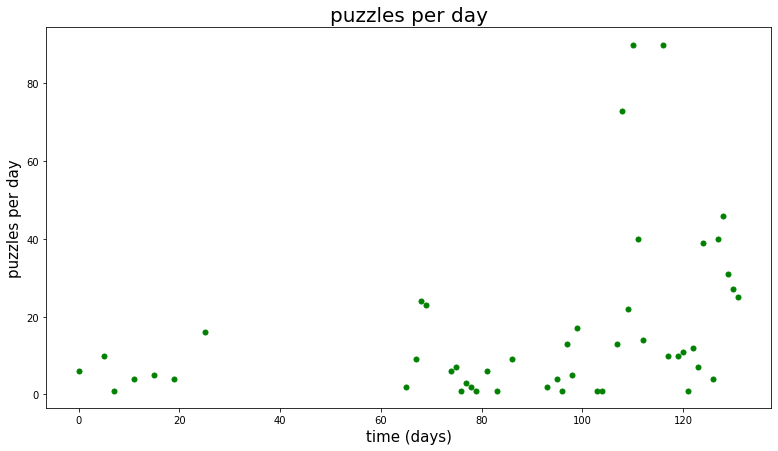

In [12]:
daily_df_gt0 = daily_df[daily_df['count'] > 0]
isli.scatter(daily_df_gt0.index, daily_df_gt0['count'], xlabel='time (days)',
             ylabel='puzzles per day', title='puzzles per day', markersize=25);

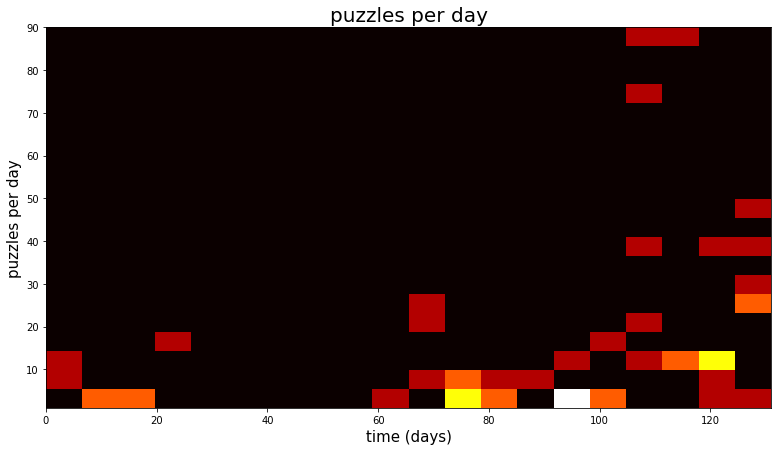

In [13]:
isli.hist2d(daily_df_gt0.index, daily_df_gt0['count'], bins=(20, 20), xlabel='time (days)',
            ylabel='puzzles per day', title='puzzles per day', cmap='hot');
